In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('/content/data/raw/retail_store_sales.csv')

df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [10]:
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe())

Shape: (12575, 11)


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11966 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  8376 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


None

,Price Per Unit,Quantity,Total Spent,Transaction Date
count,11966.000000,11971.000000,11971.000000,12575
mean,23.365912,5.536380,129.652577,2023-07-12 20:23:41.105368064
min,5.000000,1.000000,5.000000,2022-01-01 00:00:00
25%,14.000000,3.000000,51.000000,2022-09-30 00:00:00
50%,23.000000,6.000000,108.500000,2023-07-13 00:00:00
75%,33.500000,8.000000,192.000000,2024-04-24 00:00:00
max,41.000000,10.000000,410.000000,2025-01-18 00:00:00
std,10.743519,2.857883,94.750697,NaN


In [11]:
missing_count = df.isnull().sum()
missing_percent = 100 * missing_count / len(df)
missing_overview = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

In [12]:
os.makedirs('../results/tables', exist_ok=True)
missing_overview.to_csv('../results/tables/missing_overview_clustering.csv')
display(missing_overview.head(10))

,missing_count,missing_percent
Discount Applied,4199,33.391650
Item,1213,9.646123
Price Per Unit,609,4.842942
Total Spent,604,4.803181
Quantity,604,4.803181
Transaction ID,0,0.000000
Customer ID,0,0.000000
Category,0,0.000000
Payment Method,0,0.000000
Location,0,0.000000


In [18]:
dups = df.duplicated().sum()
print("Number of duplicate rows:", dups)
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows.to_csv('../results/tables/duplicate_rows_clustering.csv', index=False)

Number of duplicate rows: 0


In [14]:
os.makedirs('../results/figures', exist_ok=True)

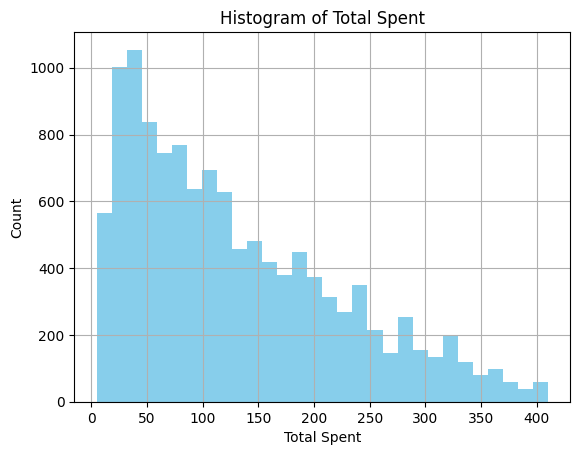

In [15]:
plt.figure()
df['Total Spent'].dropna().hist(bins=30, color='skyblue') # Drop NaNs before plotting
plt.title('Histogram of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Count')
plt.savefig('../results/figures/hist_total_spent.png')
plt.show()

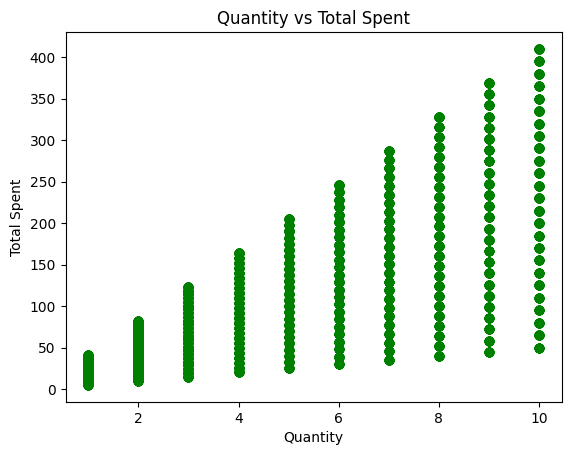

In [16]:
plt.figure()
df_cleaned_for_scatter = df.dropna(subset=['Quantity', 'Total Spent']) # Drop NaNs for scatter plot
plt.scatter(df_cleaned_for_scatter['Quantity'], df_cleaned_for_scatter['Total Spent'], alpha=0.6, color='green')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.title('Quantity vs Total Spent')
plt.savefig('../results/figures/scatter_qty_total.png')
plt.show()

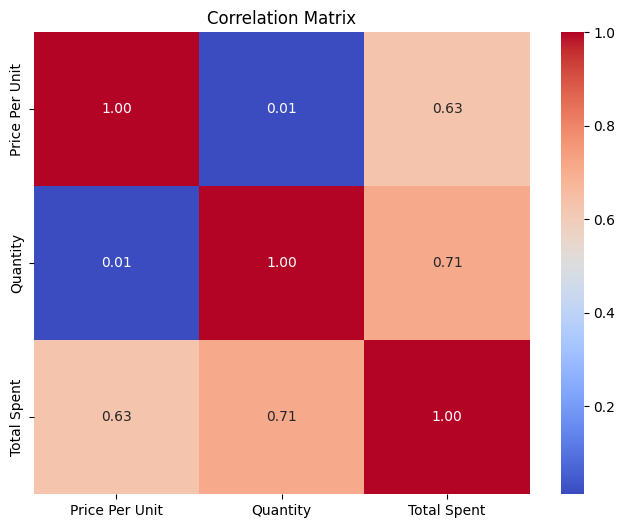

In [17]:
plt.figure(figsize=(8,6))
num_cols = df.select_dtypes(include=[np.number])
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('../results/figures/corr_matrix.png')
plt.show()